# Norms function in numpy
-----
> ### _Norms are used to measure the size of a vector. They are used in machine learning to measure the distance between two vectors._

General formula for a _p_-norm of vector v is:

$$||x||_p = (\sum_{i}|x_i|^p)^{1/p}$$

where $x$ is a vector and $n$ is the number of elements in the vector.

There are 2 widely used norms:

* $L^1$ norm (also known as Manhattan norm or Taxicab norm)

* $L^2$ norm (also known as Euclidean norm)

Also some other norms are:

* $L^0$ norm (also known as Zero norm)

* $L^{\infty}$ norm (also known as Max norm)


Some properties of norms are:

1. $||x||_p \geq 0$ for all $x$ and $p$

2. $||x||_p = 0$ if and only if $x = 0$

3. $||\alpha x||_p = |\alpha||x||_p$ for all $\alpha \in \mathbb{R}$

4. $||x + y||_p \leq ||x||_p + ||y||_p$ for all $x$ and $y$ (Triangle inequality)

5. $||x||_p = ||x||_{-p}$

6. $||x||_p = ||x||_{\infty}$ if and only if $p = \infty$





Some examples of norms:

In [3]:
#Run this cell first to import the necessary libraries

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [4]:
#compute the norm of a 2D vector
v = np.array([3,4])

def l2_norm(v):
    return np.sqrt(np.sum(v**2))

print(l2_norm(v))

5.0


Text(0.5, 1.0, 'L2 Norm')

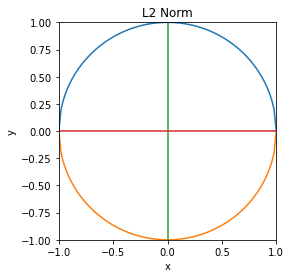

In [13]:

#Back calculate the y value for a given x and norm

NORMS = 1
X = np.linspace(-NORMS,NORMS,100)

def back_calc_l2(x,norm):
    return np.sqrt(norm**2-x**2)


Y = back_calc_l2(X,NORMS)
#because sqrt is not defined for negative numbers
#so we need to reverse the array

#plot the norm circle, with the axis
fig, ax = plt.subplots()
ax.plot(X,Y)
ax.plot(X,-Y)
ax.plot([0,0],[-NORMS,NORMS])
ax.plot([-NORMS,NORMS],[0,0])
ax.set_aspect('equal')
ax.set_xlim(-NORMS,NORMS)
ax.set_ylim(-NORMS,NORMS)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('L2 Norm')


Text(0.5, 1.0, 'L1 Norm')

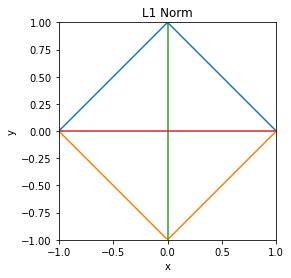

In [14]:
#back calculate the Y value for a given x and norm


def back_calc_l1_y(y,norm):
    return norm - np.abs(y)

Y = back_calc_l1_y(X,NORMS)
#plot the norm circle, with the axis
fig, ax = plt.subplots()
ax.plot(X,Y)
ax.plot(X,-Y)
ax.plot([0,0],[-NORMS,NORMS])
ax.plot([-NORMS,NORMS],[0,0])
ax.set_aspect('equal')
ax.set_xlim(-NORMS,NORMS)
ax.set_ylim(-NORMS,NORMS)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('L1 Norm')



Text(0.5, 1.0, 'Linf Norm')

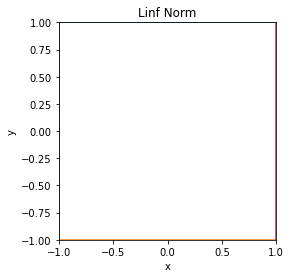

In [15]:
#plot the inf norm 
fig, ax = plt.subplots()
ax.plot([-NORMS,NORMS],[NORMS,NORMS])
ax.plot([-NORMS,NORMS],[-NORMS,-NORMS])
ax.plot([-NORMS,-NORMS],[-NORMS,NORMS])
ax.plot([NORMS,NORMS],[-NORMS,NORMS])
ax.set_aspect('equal')
ax.set_xlim(-NORMS,NORMS)
ax.set_ylim(-NORMS,NORMS)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linf Norm')


We can manually calculate the norms of a matrix using the above formula. But we can also use the numpy.linalg.norm() function to calculate the norms of a matrix.


In [16]:
#Calculate the L2 norm manually
v = np.array([3,4])
v_sq = v.T @ v # same as np.dot(v.T,v)
v_norm = np.sqrt(v_sq)
print(v_norm)

#is the same as
v_norm = np.linalg.norm(v)
print(v_norm)

5.0
5.0


The numpy.linalg.norm() function takes 4 arguments:

1. x: Input array. If axis is None, x must be 1-D or 2-D, unless ord = None. If both axis and ord are None, the 2-norm of x.ravel will be returned.

2. ord: Order of the norm. inf means numpy’s inf object. Default is 2.

3. axis: Axis along which to compute the vector norms. If axis is None, the norm of the whole matrix is returned. Default is None. 

4. keepdims: If this is set to True, the axes which are normed over are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the original x. Default is False.



The function returns the norm of the matrix.


```python
np.linalg.norm([1,2,3])
np.linalg.norm([1,2,3], ord=1)
np.linalg.norm([1,2,3], ord=np.inf)
np.linalg.norm([[1,2,3],[4,5,6]], axis=0)
np.linalg.norm([[1,2,3],[4,5,6]], axis=1, keepdims=True)



```




### p-norm of matrix A

$$||A||_p = (\sum_{i,j}|A_{ij}|^p)^{1/p}$$

where $A$ is a matrix and $ij$ are the elements of the matrix.

Example:

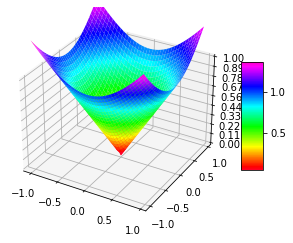

In [17]:
#plot a L2 norm 3D
fig = plt.figure()
ax = plt.subplot(projection='3d')

# Make data.
X = np.arange(-NORMS, NORMS, 0.05)
Y = np.arange(-NORMS, NORMS, 0.05)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X**2 + Y**2)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=mpl.cm.gist_rainbow,
                          linewidth=1, antialiased=True)   

# Customize the z axis.
ax.set_zlim(0, NORMS)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()




### Application of norms in machine learning

* In machine learning, norms are used to measure the distance between two vectors.

* In linear regression, we use the Euclidean norm to measure the distance between the predicted value and the actual value.

* etc.

### Example of application of norms in machine learning:

Measuring the distance between predicted value and actual value:

Prediction files can be found [here](https://github.com/dtungpka/Applied-Mathematics-for-Artificial-Intelligence/tree/main/Norms)

In [7]:
import pickle

predicted_005 = pickle.load(open('train_predictions_0.005.pickle','rb'))
predicted_01 = pickle.load(open('train_predictions_0.01.pickle','rb'))
actual = pickle.load(open('train_set_y.pickle','rb'))

#calculate the L2 norm
l2_norm_005 = np.linalg.norm(np.array(predicted_005)-np.array(actual))
l2_norm_01 = np.linalg.norm(np.array(predicted_01)-np.array(actual))
print(l2_norm_005)
print(l2_norm_01)

#because norm of 005 is greater than norm of 01, we can conclude that 01 is a better model



19.87460691435179
19.82422760159901


### Author

##### Group 16:

* Dương Doãn Tùng - [Github](https://github.com/dtungpka)

* Lê Hoàng Nam 

* Phạm Văn Công

### References

* https://en.wikipedia.org/wiki/Norm_(mathematics)

* https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

* https://www.youtube.com/watch?v=NcPUI7aPFhA

* 2.5 Norms, Deep Learning Book Series - Hadrien Jean


##### Special thanks to 

* https://www.youtube.com/watch?v=dQw4w9WgXcQ